In [4]:
import os
import torch
import torchaudio
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from pathlib import Path

In [16]:

def load_audio_files(path: str, label: str):
    # Initialize an empty list to store the dataset
    dataset = []

    # List all WAV files in the specified path
    walker = sorted(str(p) for p in Path(path).glob('*.wav'))

    # Iterate over the list of audio file paths
    for i, file_path in enumerate(walker):
        # Split the file path into directory and filename
        path, filename = os.path.split(file_path)
        name, _ = os.path.splitext(filename)

        # Load the audio waveform and sample rate using torchaudio
        waveform, sample_rate = torchaudio.load(file_path)

        # Create an entry for the dataset, including waveform, sample rate, label, and ID
        entry = {'waveform': waveform, 'sample_rate': sample_rate, 'label': label, 'id': i}

        # Append the entry to the dataset list
        dataset.append(entry)

    # Return the populated dataset
    return dataset

In [22]:
# Load audio files from the 'Data/Screaming' directory with the label 'yes'
screaming_dataset = load_audio_files('Data/Screaming', 'yes')

# Display the 'screaming_dataset' which contains loaded audio data
screaming_dataset

[{'waveform': tensor([[0.0000e+00, 6.6658e-10, 7.3771e-10,  ..., 0.0000e+00, 0.0000e+00,
           0.0000e+00]]),
  'sample_rate': 44100,
  'label': 'yes',
  'id': 0}]

In [ ]:
# Load audio files from the 'Data/NotScreaming' directory with the label 'not'
not_screaming_dataset = load_audio_files('Data/NotScreaming', 'not')

# Display the 'screaming_dataset' which contains loaded audio data
not_screaming_dataset

In [18]:
display(len(screaming_dataset), len(not_screaming_dataset))

1

In [23]:
# Create a data loader for the 'screaming_dataset' with a batch size of 1, shuffle data, and no additional worker processes.
train_loader_screaming = torch.utils.data.DataLoader(screaming_dataset, batch_size=1,
                                                     shuffle=True, num_workers=0)

In [ ]:
# Create a data loader for the 'not_screaming_dataset' with a batch size of 1, shuffle data, and no additional worker processes.
train_loader_not_screaming = torch.utils.data.DataLoader(not_screaming_dataset, batch_size=1,
                                                     shuffle=True, num_workers=0)

In [24]:
# Access the waveform and sample rate of the first entry in the 'screaming_dataset'
screaming_waveform = screaming_dataset[0]['waveform']
screaming_sample_rate = screaming_dataset[0]['sample_rate']

# Print the waveform, sample rate, label, and ID of the first entry
print(f'Screaming Waveform: {screaming_waveform}')
print(f'Screaming Sample Rate: {screaming_sample_rate}')
print(f'Screaming Label: {screaming_dataset[0]["label"]}')
print(f'Screaming ID: {screaming_dataset[0]["id"]} \n')

# Access the waveform and sample rate of the first entry in the 'screaming_dataset'
not_screaming_waveform = not_screaming_dataset[0]['waveform']
not_screaming_sample_rate = not_screaming_dataset[0]['sample_rate']

# Print the waveform, sample rate, label, and ID of the first entry
print(f'Screaming Waveform: {not_screaming_waveform}')
print(f'Screaming Sample Rate: {not_screaming_sample_rate}')
print(f'Screaming Label: {not_screaming_dataset[0]["label"]}')
print(f'Screaming ID: {not_screaming_dataset[0]["id"]} \n')

Screaming Waveform: tensor([[0.0000e+00, 6.6658e-10, 7.3771e-10,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])
Screaming Sample Rate: 44100
Screaming Label: yes
Screaming ID: 0 



In [25]:
def show_waveform(waveform, sample_rate, label):
    # Print information about the waveform, sample rate, and label
    print("Waveform: {}\nSample rate: {}\nLabels: {} \n".format(waveform, sample_rate, label))

    # Calculate the new sample rate by dividing the original sample rate by 10
    new_sample_rate = sample_rate / 10

    # Resample applies to a single channel, so we resample the first channel here
    channel = 0

    # Apply resampling to the waveform
    waveform_transformed = torchaudio.transforms.Resample(sample_rate, new_sample_rate)(waveform[channel, :].view(1, -1))

    # Print the shape of the transformed waveform and the new sample rate
    print("Shape of transformed waveform: {}\nSample rate: {}".format(waveform_transformed.size(), new_sample_rate))

    # Plot the transformed waveform
    plt.figure()
    plt.plot(waveform_transformed[0, :].numpy())

Waveform: tensor([[0.0000e+00, 6.6658e-10, 7.3771e-10,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])
Sample rate: 44100
Labels: yes 

Shape of transformed waveform: torch.Size([1, 44122])
Sample rate: 4410.0


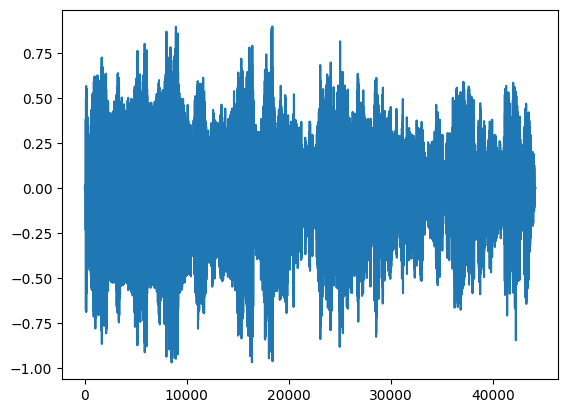

In [26]:
show_waveform(screaming_waveform, screaming_sample_rate, 'yes')

In [ ]:
show_waveform(not_screaming_waveform, not_screaming_sample_rate, 'not')

In [39]:
def show_spectrogram(waveform_classA, waveform_classB):
    # Compute the spectrogram for the first waveform (class A)
    yes_spectrogram = torchaudio.transforms.Spectrogram()(waveform_classA)
    print("\nShape of yes spectrogram: {}".format(yes_spectrogram.size()))

    # Compute the spectrogram for the second waveform (class B)
    no_spectrogram = torchaudio.transforms.Spectrogram()(waveform_classB)
    print("Shape of no spectrogram: {}".format(no_spectrogram.size()))

    # Create a figure with two subplots for visualization
    plt.figure()

    # Plot the spectrogram of class A (left subplot)
    plt.subplot(1, 2, 1)
    plt.title("Features of {}".format('yes'))

    # Set the aspect ratio to 'auto' for the y-axis to elongate it
    plt.imshow(yes_spectrogram.log2()[0, :, :].numpy(), cmap='viridis', aspect='auto')

    # Plot the spectrogram of class B (right subplot)
    plt.subplot(1, 2, 2)
    plt.title("Features of {}".format('no'))

    # Set the aspect ratio to 'auto' for the y-axis to elongate it
    plt.imshow(no_spectrogram.log2()[0, :, :].numpy(), cmap='viridis', aspect='auto')


Shape of yes spectrogram: torch.Size([1, 201, 2207])
Shape of no spectrogram: torch.Size([1, 201, 2207])


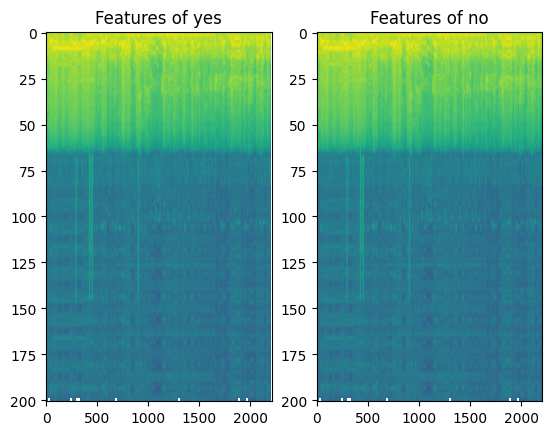

In [40]:
show_spectrogram(screaming_waveform, not_screaming_waveform)

In [43]:
def show_mel_spectrogram(waveform, sample_rate):
    # Compute the Mel spectrogram from the input waveform
    mel_spectrogram = torchaudio.transforms.MelSpectrogram(sample_rate)(waveform)

    # Print the shape of the Mel spectrogram
    print("Shape of spectrogram: {}".format(mel_spectrogram.size()))

    # Create a new figure for visualization
    plt.figure()

    # Display the Mel spectrogram as an image with a color map 'viridis'
    plt.imshow(mel_spectrogram.log2()[0, :, :].numpy(), cmap='viridis', aspect='auto')

Shape of spectrogram: torch.Size([1, 128, 2207])


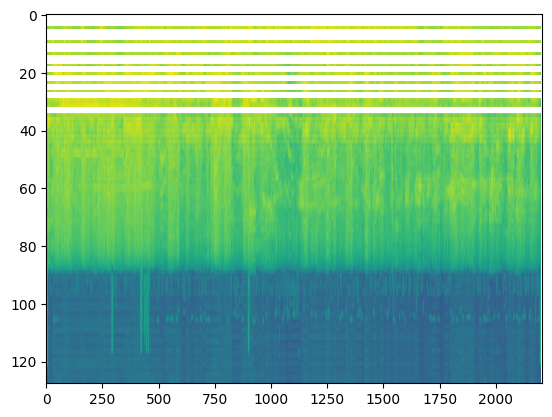

In [44]:
show_mel_spectrogram(screaming_waveform, screaming_sample_rate)

In [49]:
def show_mfcc(waveform, sample_rate):
    # Compute the MFCC spectrogram from the input waveform
    mfcc_spectrogram = torchaudio.transforms.MFCC(sample_rate=sample_rate)(waveform)

    # Print the shape of the MFCC spectrogram
    print("Shape of spectrogram: {}".format(mfcc_spectrogram.size()))

    # Create a new figure for visualization
    plt.figure()

    # Display the MFCC spectrogram as an image with a color map 'viridis'
    plt.imshow(mfcc_spectrogram.log2()[0, :, :].numpy(), cmap='viridis', aspect='auto')

    # Create a separate figure for the MFCC plot with an elongated y-axis
    plt.figure()
    plt.plot(mfcc_spectrogram.log2()[0, :, :].numpy())
    plt.draw()

Shape of spectrogram: torch.Size([1, 40, 2207])


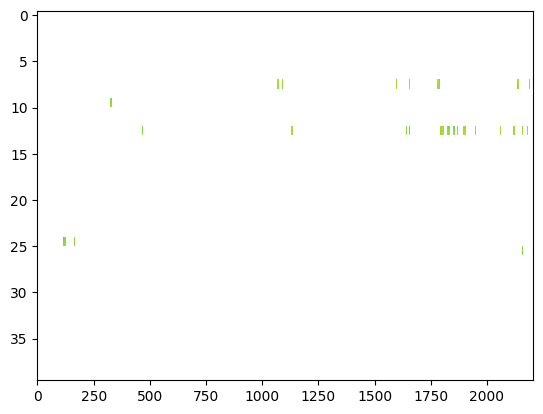

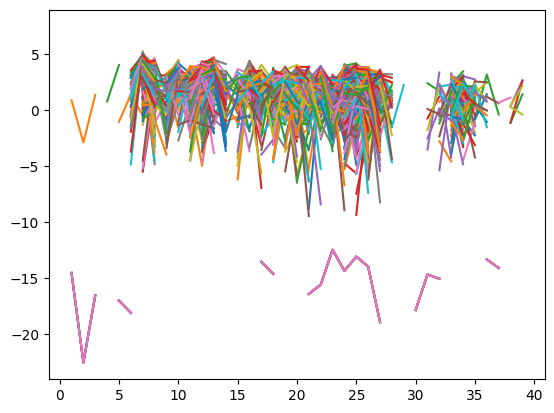

In [50]:
show_mfcc(screaming_waveform,  screaming_sample_rate)

In [ ]:
show_mfcc(not_screaming_waveform,  not_screaming_sample_rate)